In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, FunctionTransformer, LabelEncoder, OrdinalEncoder
from sklearn.model_selection import cross_validate

from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, plot_confusion_matrix

from sklearn.metrics import confusion_matrix, plot_confusion_matrix,\
    precision_score, recall_score, accuracy_score, f1_score, log_loss,\
    roc_curve, roc_auc_score, classification_report

# Import Data and EDA

In [2]:
df= pd.read_csv("/Users/allisongao/Dropbox/Flatiron/Phase 4/NLP_project/NLP Data.csv", encoding='latin1')

In [928]:
df

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion
...,...,...,...
9088,Ipad everywhere. #SXSW {link},iPad,Positive emotion
9089,"Wave, buzz... RT @mention We interrupt your re...",NaN,No emotion toward brand or product
9090,"Google's Zeiger, a physician never reported po...",NaN,No emotion toward brand or product
9091,Some Verizon iPhone customers complained their...,NaN,No emotion toward brand or product


In [103]:
df.iloc[0,0]

'.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.'

In [929]:
df["is_there_an_emotion_directed_at_a_brand_or_product"].value_counts()

No emotion toward brand or product    5389
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [930]:
df["target"] = df["is_there_an_emotion_directed_at_a_brand_or_product"]
df["text"] = df["tweet_text"]
df.drop("is_there_an_emotion_directed_at_a_brand_or_product", axis = 1, inplace=True)
df.drop("tweet_text", axis = 1, inplace=True)
df

,emotion_in_tweet_is_directed_at,target,text
0,iPhone,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,iPad or iPhone App,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,iPad,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,iPad or iPhone App,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,Google,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...
...,...,...,...
9088,iPad,Positive emotion,Ipad everywhere. #SXSW {link}
9089,NaN,No emotion toward brand or product,"Wave, buzz... RT @mention We interrupt your re..."
9090,NaN,No emotion toward brand or product,"Google's Zeiger, a physician never reported po..."
9091,NaN,No emotion toward brand or product,Some Verizon iPhone customers complained their...


In [931]:
df["emotion_in_tweet_is_directed_at"]

0                   iPhone
1       iPad or iPhone App
2                     iPad
3       iPad or iPhone App
4                   Google
               ...        
9088                  iPad
9089                   NaN
9090                   NaN
9091                   NaN
9092                   NaN
Name: emotion_in_tweet_is_directed_at, Length: 9093, dtype: object

In [932]:
df['emotion_in_tweet_is_directed_at'] = df['emotion_in_tweet_is_directed_at'].map(
    
                                                                         {'iPad': "Apple", 
                                                                         'Apple': "Apple",
                                                                         'iPad or iPhone App ': "Apple",
                                                                         'Google ': "Google",
                                                                         'iPhone': "Apple",
                                                                         'Other Google product or service ': "Google",
                                                                         'Android App ': "Google",
                                                                         'Android': "Google",
                                                                         "Other Apple product or service": "Apple",
                                                                         "NaN": "Unknown"
                                                                         })

In [933]:
df['emotion_in_tweet_is_directed_at'].fillna('Unknown', inplace=True)

In [934]:
df['emotion_in_tweet_is_directed_at'].value_counts()

Unknown    7076
Apple      1939
Google       78
Name: emotion_in_tweet_is_directed_at, dtype: int64

In [935]:
df.drop_duplicates(inplace=True)
df.dropna(subset = ["text"], inplace=True)

In [936]:
df["target"].value_counts()

No emotion toward brand or product    5375
Positive emotion                      2970
Negative emotion                       569
I can't tell                           156
Name: target, dtype: int64

In [937]:
df.head()

,emotion_in_tweet_is_directed_at,target,text
0,Apple,Negative emotion,.@wesley83 I have a 3G iPhone. After 3 hrs twe...
1,Unknown,Positive emotion,@jessedee Know about @fludapp ? Awesome iPad/i...
2,Apple,Positive emotion,@swonderlin Can not wait for #iPad 2 also. The...
3,Unknown,Negative emotion,@sxsw I hope this year's festival isn't as cra...
4,Unknown,Positive emotion,@sxtxstate great stuff on Fri #SXSW: Marissa M...


In [938]:
graph1 = pd.DataFrame(df.groupby(['emotion_in_tweet_is_directed_at','target'], as_index = False).size())
graph1

,emotion_in_tweet_is_directed_at,target,size
0,Apple,I can't tell,7
1,Apple,Negative emotion,324
2,Apple,No emotion toward brand or product,55
3,Apple,Positive emotion,1549
4,Google,Negative emotion,8
5,Google,No emotion toward brand or product,1
6,Google,Positive emotion,68
7,Unknown,I can't tell,149
8,Unknown,Negative emotion,237
9,Unknown,No emotion toward brand or product,5319


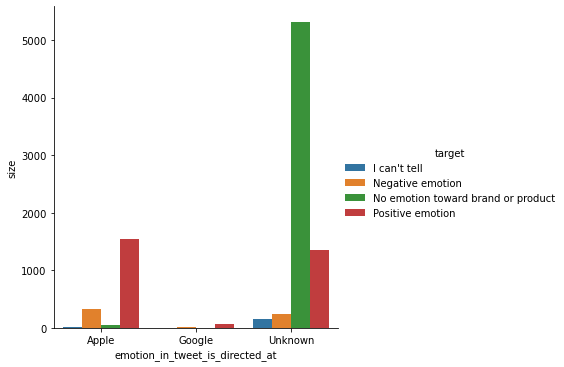

In [939]:
sns.catplot(x="emotion_in_tweet_is_directed_at", y="size", hue="target", kind="bar", data=graph1)

In [940]:
graph2 = pd.DataFrame(df.groupby(['target','emotion_in_tweet_is_directed_at'], as_index = False).size())
graph2

,target,emotion_in_tweet_is_directed_at,size
0,I can't tell,Apple,7
1,I can't tell,Unknown,149
2,Negative emotion,Apple,324
3,Negative emotion,Google,8
4,Negative emotion,Unknown,237
5,No emotion toward brand or product,Apple,55
6,No emotion toward brand or product,Google,1
7,No emotion toward brand or product,Unknown,5319
8,Positive emotion,Apple,1549
9,Positive emotion,Google,68


<Figure size 7200x3600 with 0 Axes>

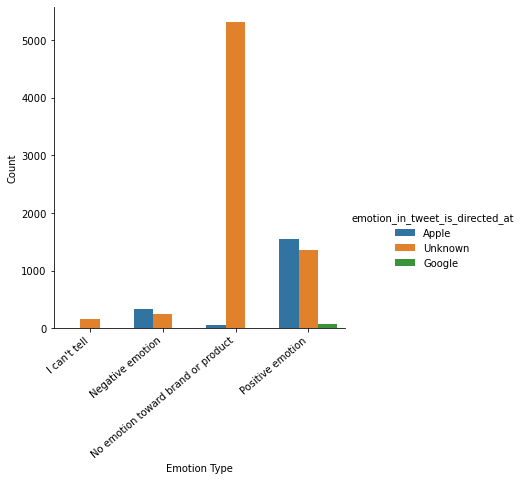

In [941]:
plt.figure(figsize=(100,50))
by_target_type = sns.catplot(x="target", y="size", hue="emotion_in_tweet_is_directed_at", kind="bar", data=graph2)
by_target_type.set(xlabel='Emotion Type', ylabel='Count')
by_target_type.set_xticklabels(rotation=40, ha="right")
plt.show()

<Figure size 11520x5760 with 0 Axes>

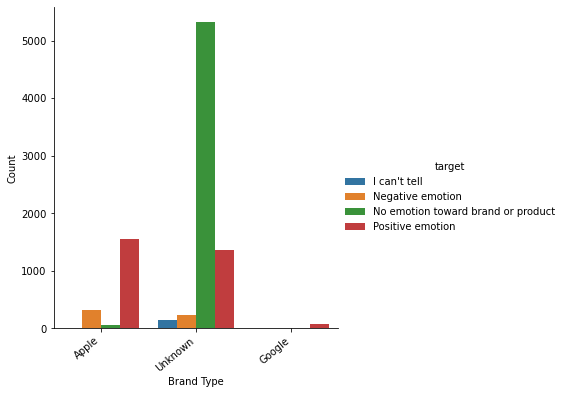

In [942]:
plt.figure(figsize = (160,80))
by_brand_type = sns.catplot(x="emotion_in_tweet_is_directed_at", y="size", hue="target", kind="bar", data=graph2)
by_brand_type.set(xlabel='Brand Type', ylabel='Count')
by_brand_type.set_xticklabels(rotation=40, ha="right")
plt.show()

In [943]:
df_for_graph = df.loc[df["target"] != "I can't tell"]

Text(0.5, 1.0, 'Predictive Class Frequency Count')

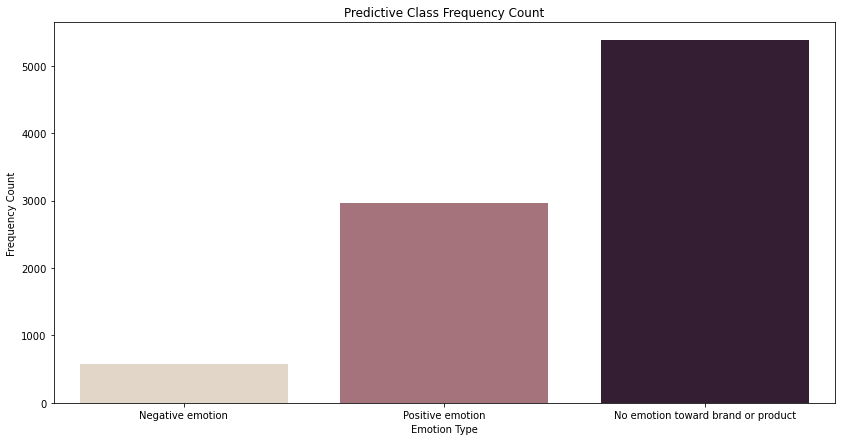

In [944]:
plt.figure(figsize = (14,7))
graph_emotion_type = sns.countplot(x="target", palette="ch:.25", data=df_for_graph)
graph_emotion_type.set_xlabel("Emotion Type")
graph_emotion_type.set_ylabel("Frequency Count")
graph_emotion_type.set_title("Predictive Class Frequency Count")

In [945]:
from nltk.tokenize import TweetTokenizer
tweet_tokenizer = TweetTokenizer()

tweet_tokens = []

for x in df["text"]:
    print(tweet_tokenizer.tokenize(x))
    tweet_tokens.append(tweet_tokenizer.tokenize(x))

['.', '@wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After', '3', 'hrs', 'tweeting', 'at', '#RISE_Austin', ',', 'it', 'was', 'dead', '!', 'I', 'need', 'to', 'upgrade', '.', 'Plugin', 'stations', 'at', '#SXSW', '.']
['@jessedee', 'Know', 'about', '@fludapp', '?', 'Awesome', 'iPad', '/', 'iPhone', 'app', 'that', "you'll", 'likely', 'appreciate', 'for', 'its', 'design', '.', 'Also', ',', "they're", 'giving', 'free', 'Ts', 'at', '#SXSW']
['@swonderlin', 'Can', 'not', 'wait', 'for', '#iPad', '2', 'also', '.', 'They', 'should', 'sale', 'them', 'down', 'at', '#SXSW', '.']
['@sxsw', 'I', 'hope', 'this', "year's", 'festival', "isn't", 'as', 'crashy', 'as', 'this', "year's", 'iPhone', 'app', '.', '#sxsw']
['@sxtxstate', 'great', 'stuff', 'on', 'Fri', '#SXSW', ':', 'Marissa', 'Mayer', '(', 'Google', ')', ',', 'Tim', "O'Reilly", '(', 'tech', 'books', '/', 'conferences', ')', '&', 'Matt', 'Mullenweg', '(', 'Wordpress', ')']
['@teachntech00', 'New', 'iPad', 'Apps', 'For', '#SpeechTherapy', 'An

['What', 'time', '?', "I'm", 'in', '.', 'RT', '@mention', "I'll", 'be', 'at', 'the', 'Austin', 'Convention', 'Center', 'today', 'w', '/', 'my', '@mention', 'fam', '...', 'showing', 'my', 'new', 'iPhone', 'game', '.', '#SXSW']
['At', '#sxsw', '?', 'Join', 'us', 'and', '@mention', 'for', 'a', 'drink', '(', 'or', '2', ')', 'at', 'Fado', 'on', '4th', 'at', '7pm', '.', '{', 'link', '}']
['At', '#SXSW', '?', '?', 'MindTouchers', '@mention', '@mention', '@mention', 'are', 'there', 'giving', 'iPad', 'demos', 'of', 'MindTouch', 'TCS', '!', 'Tweet', 'them', 'to', 'check', 'it', 'out', '!']
['Apaan', 'nih', '?', 'RT', '@mention', '@mention', 'RT', 'New', '#UberSocial', 'for', '#iPhone', 'now', 'in', 'the', 'App', 'Store', 'includes', 'UberGuide', 'to', '#SXSW']
['\x89', '÷', '¼', '?', '?', '?', '\x89', '÷', '_', '{', 'link', '}', '\x89', 'ã_', '#edchat', '#musedchat', '#sxsw', '#sxswi', '#classical', '#newTwitter']
['\x89', '÷', '¼', '?', '?', '?', '\x89', '÷', '_', '{', 'link', '}', '\x89', 'ã_'

['Aha', '!', 'Found', 'proof', 'of', 'lactation', 'room', ',', 'excuse', 'me', ',', '"', "Mother's", 'Room', ',', '"', 'brought', 'to', 'you', 'by', 'Google', ',', 'at', 'last', "year's", '#SXSW', '.', '{', 'link', '}']
['makes', 'good', 'sense', 'RT', '@mention', 'Apple', 'set', 'to', 'open', 'popup', 'shop', 'in', 'core', 'of', 'SXSW', 'action', '{', 'link', '}', 'via', '@mention', '#SXSW']
['UBER', 'BRAND', 'SMART', ':', 'Gonna', 'move', 'a', 'ton', 'of', 'iPad', '2', '-', '#Apple', 'opening', 'a', 'popup', 'shop', 'in', 'Austin', 'for', '#SxSW', '{', 'link', '}', 'via', '@mention', '@mention']
['#localmind', 'sounds', 'awesome', '..', 'location', 'based', 'Q', '&', 'A', 'could', 'be', 'incredibly', 'useful', '.', '{', 'link', '}', '#iphone', '#sxsw']
['#sxsw', 'ipad', 'store', 'sold', 'out', 'of', 'everything', 'except', '64gig', 'wifi', 'only', 'white']
['Just', 'heard', 'that', 'Apple', 'is', 'opening', 'a', 'store', 'in', 'downtown', 'Austin', 'tomorrow', 'to', 'sell', 'iPads', 

['I', 'threw', 'this', 'together', 'to', 'keep', 'on', 'my', 'iPad', 'to', 'attempt', 'to', 'keep', 'up', 'with', 'all', 'the', 'after', 'hours', 'stuff', 'this', 'weekend', '.', '#sxsw', '{', 'link', '}']
["Apple's", 'white', 'earbuds', '-', 'good', 'symbol', 'of', 'our', 'need', 'for', 'social', 'proof', ',', 'when', 'the', 'iPod', 'launched', ',', 'we', 'all', 'knew', 'who', 'had', 'a', 'new', 'toy', '#guykawasaki', '#SXSW']
['EightBit', 'Hits', 'The', 'Street', 'Running', 'With', 'HTML', '5', 'Power', ';', 'SXSW', 'Just', 'Got', 'A', 'Lot', 'More', 'Fun', '{', 'link', '}', '#iPhone', '#NES', '#SXSW', '#TheStreet']
['@mention', 'Hmmm', '...', 'thinking', 'about', 'borrowing', 'an', 'iPad', 'from', 'work', 'for', 'taking', 'notes', 'at', '#SXSW', '.', 'Works', 'well', 'enough', 'that', 'I', "don't", 'have', 'to', 'lug', 'the', 'MBP', '?']
['@mention', 'Hmmmm', '{', 'link', '}', '#SXSW', '#Apple']
['Well', ',', 'Cashmore', 'just', 'gave', 'the', 'new', 'iPad', 'a', 'crushing', 'non-en

['At', 'Team', 'Android', 'party', ',', 'come', 'by', '@mention', 'table', '&', 'show', 'us', 'Appolicious', 'app', 'on', 'yr', 'phone', 'to', 'enter', 'to', 'win', 'Nexus', 'S', '!', '{', 'link', '}', '#sxsw']
['My', 'free', 'android', 'tshirt', '#SXSW', '{', 'link', '}']
['#sxsw', 'q', ':', 'Android', 'webkit', 'lags', 'safari', 'webkit', '@mention', 'we', 'want', 'acceleration', 'to', 'be', 'pervasive', '#browserwars']
['Dear', 'friends', 'secret', 'Michael', 'Cera', '/', 'Barbarian', 'Group', 'show', 'at', '5', 'pm', 'here', ':', '{', 'link', '}', '@mention', '@mention', '@mention', '@mention', '#sxsw', '#sxswi']
['Dear', 'friends', ':', 'would', 'anyone', 'lend', 'me', 'their', 'iPad', ',', 'Wed-Mon', 'Mar', '9-14', 'for', '#sxsw', '?', 'Let', 'me', 'drop', 'my', 'data', 'on', 'it', '?', '(', 'my', 'back', 'would', 'thank', 'you', ')', '#fb']
['Is', 'the', 'Tandy', '100', 'the', 'Great', 'Grandfather', 'of', 'the', 'iPad', '?', 'U', 'tell', 'me', '?', '{', 'link', '}', '#SXSWi', '

['RT', '@mention', 'Check', 'out', 'the', 'FREE', '@mention', 'Sampler', 'on', 'iTunes', '!', '{', 'link', '}', '#SXSW']
['RT', '@mention', 'Check', 'out', 'the', 'FREE', 'SXSW', 'Sampler', 'on', 'iTunes', '!', '{', 'link', '}', '#SXSW']
['RT', '@mention', 'Check', 'out', 'the', 'new', '@mention', 'app', '{', 'link', '}', '-', 'this', 'is', 'gonna', 'be', 'HUGE', 'next', 'week', 'at', '#sxsw', 'and', 'beyond', '.']
['RT', '@mention', 'Check', 'out', 'this', 'new', '#android', 'app', '#bizzy', ',', "we're", 'using', 'it', 'to', 'check', 'out', '#sxsw', '{', 'link', '}']
['RT', '@mention', 'Check', 'out', 'Your', 'Mom', 'Has', 'an', 'iPad', ':', 'Designing', 'for', 'Boomers', 'at', 'SXSW', '.', '{', 'link', '}', '#SXSW']
['RT', '@mention', 'Checking', 'out', 'the', 'Apple', 'pop', 'up', 'store', '.', 'Looking', 'fwd', 'to', 'checking', 'out', 'the', 'iPad', '2', '.', '#sxsw', '#mosaicxm', 'MK', '{', 'link', '}']
['RT', '@mention', 'Checkins', 'are', 'fun', ',', 'but', 'we', 'need', 'to',

['RT', '@mention', 'Selfishness', 'as', 'seen', 'through', 'brands', ':', 'Mac', 'versus', 'Apple', '.', 'Apple', 'wins', ':', 'they', 'are', 'masters', 'at', 'being', 'self-referential', '#sxsw']
['RT', '@mention', 'Send', 'the', 'waaaambulance', 'RT', '@mention', 'No', ',', 'I', "didn't", 'get', 'an', 'iPad', '2', ':(', 'No', ',', "I'm", 'not', 'at', '#sxsw', ':(', 'Yes', ',', 'I', 'am', 'depressed', ':(']
['RT', '@mention', 'SerÌÁ', 'cierto', '?', 'RT', '@mention', 'Google', 'to', 'Launch', 'Major', 'New', 'Social', 'Network', 'Called', 'Circles', ',', 'Possibly', 'Today', 'rww.to/f6BCEt', '#sxsw']
['RT', '@mention', 'Server', 'Challenge', 'is', 'a', 'huge', 'hit', 'at', '#sxsw', '!', 'Come', 'by', 'booth', '400', 'to', 'try', 'your', 'hand', '.', 'Win', 'an', 'iPhone', '4', 'bottle', 'opener', 'case', 'by', 'beating', '2', 'mins', '.']
['RT', '@mention', 'Setting', 'up', 'a', 'pop', 'up', 'shop', '@mention', '#SXSW', 'was', 'the', 'smartest', 'move', 'for', 'the', 'iPad', 'IMHO', '

['Learned', 'from', 'sponsored', '#sxsw', 'software', ':', '1', ')', 'Austin', '=', 'nice', 'walking', 'city', ';', '2', ')', 'Mapquest', '=', 'piece', 'of', 'shit', 'mapping', 'software', '.', '(', 'go', 'Google', 'Maps', '!', ')', '#fb']
['Special', 'promo', 'for', '#sxsw', 'attendees', '!', '{', 'link', '}', 'Meetchu', ',', 'quick-contact', 'capture', 'LYKWXHPYTERH', 'TT66H9TJN4YE', 'RT6N79XP37FF', 'TYP', '63MMAM7W3']
['#SXSW', 'impromptu', 'Apple', 'store', 'line', 'is', 'about', '2', 'blocks', 'long', '!', '{', 'link', '}']
['Out', 'of', 'a', 'room', 'of', '50', '+', 'people', ',', 'only', '1', 'other', 'person', 'than', 'I', 'makes', 'accessible', 'apps', '...', 'And', 'he', 'works', 'for', 'Google', 'Android', '#SXSW', '#donline']
['miami', 'horror', ',', 'tacos', 'and', 'bloody', 'marys', '.', "i'm", 'there', '.', 'https://sites.google.com/site/frontgatesxsw11/', '#sxsw']
['Find', 'me', 'around', '#sxsw', 'today', ',', 'grab', 'a', '@mention', 'slap', 'bracelet', 'and', 'ask', 

['Ringo', 'Deathstarr', 'be', 'flooding', 'ear', 'canals', 'at', 'Red', '7', 'right', 'about', 'now', ',', 'Mind', 'of', 'Adi', 'showcase', 'Location', ':', '{', 'link', '}', '#sxsw']
['#Apple', 'enthusiasts', 'lining', 'up', 'for', '#iPad2', 'outside', 'pop-up', 'Apple', 'store', 'in', 'Austin', 'for', '#SXSW', '.', '6th', '/', 'Congress', ',', 'opens', '5pm', '{', 'link', '}']
['#Hipstamatic', 'Giving', 'Away', '#SXSW', 'HipstaPaks', '{', 'link', '}', '#channels', '#news', '#apps', '#ios', '#iphone']
['One', 'more', 'time', ',', 'with', 'feeling', ':', 'Android', 'Developer', 'Meetup', 'Saturday', 'at', '#sxsw', '!', '12:30', 'pm', 'Sat', ',', 'Hilton', '615AB', '.', 'All', 'welcome', '!', 'RT', ',', 'if', 'you', 'might', '.']
['#sxsw', 'Austin', 'Apple', 'store', 'security', 'guard', 'enjoying', 'the', 'new', 'ipad', '2']
['Nice', '!', 'Austin', 'Apple', 'pop', 'up', 'shop', 'in', 'time', 'for', '#SXSW', 'RT', '@mention', 'The', 'i', 'P', 'a', 'd', 's', 'have', 'arrived', '!', '#SXS

In [884]:
tweet_tokens = pd.DataFrame(tweet_tokens)
tweet_tokens

,0,1,2,3,4,5,6,7,8,9,...,84,85,86,87,88,89,90,91,92,93
0,.,@wesley83,I,have,a,3G,iPhone,.,After,3,...,None,None,None,None,None,None,None,None,None,None
1,@jessedee,Know,about,@fludapp,?,Awesome,iPad,/,iPhone,app,...,None,None,None,None,None,None,None,None,None,None
2,@swonderlin,Can,not,wait,for,#iPad,2,also,.,They,...,None,None,None,None,None,None,None,None,None,None
3,@sxsw,I,hope,this,year's,festival,isn't,as,crashy,as,...,None,None,None,None,None,None,None,None,None,None
4,@sxtxstate,great,stuff,on,Fri,#SXSW,:,Marissa,Mayer,(,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9065,Ipad,everywhere,.,#SXSW,{,link,},None,None,None,...,None,None,None,None,None,None,None,None,None,None
9066,Wave,",",buzz,...,RT,@mention,We,interrupt,your,regularly,...,None,None,None,None,None,None,None,None,None,None
9067,Google's,Zeiger,",",a,physician,never,reported,potential,AE,.,...,None,None,None,None,None,None,None,None,None,None
9068,Some,Verizon,iPhone,customers,complained,their,time,fell,back,an,...,None,None,None,None,None,None,None,None,None,None


In [886]:
tweet_tokens_df = tweet_tokens.drop(columns = cols)
tweet_tokens_df

,combined
0,".,@wesley83,I,have,a,3G,iPhone,.,After,3,hrs,t..."
1,"@jessedee,Know,about,@fludapp,?,Awesome,iPad,/..."
2,"@swonderlin,Can,not,wait,for,#iPad,2,also,.,Th..."
3,"@sxsw,I,hope,this,year's,festival,isn't,as,cra..."
4,"@sxtxstate,great,stuff,on,Fri,#SXSW,:,Marissa,..."
...,...
9065,"Ipad,everywhere,.,#SXSW,{,link,},None,None,Non..."
9066,"Wave,,,buzz,...,RT,@mention,We,interrupt,your,..."
9067,"Google's,Zeiger,,,a,physician,never,reported,p..."
9068,"Some,Verizon,iPhone,customers,complained,their..."


In [804]:
from nltk.tokenize import TweetTokenizer
from nltk import pos_tag

In [805]:
from nltk.corpus import wordnet

def get_wordnet_pos(treebank_tag):

    if treebank_tag.startswith('J'):
        return wordnet.ADJ
    elif treebank_tag.startswith('V'):
        return wordnet.VERB
    elif treebank_tag.startswith('N'):
        return wordnet.NOUN
    elif treebank_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [806]:
sw = stopwords.words('english')

In [946]:
def doc_preparer(doc, stop_words=sw):
    '''
    
    :param doc: a document from the review corpus 
    :return: a document string with words which have been 
            lemmatized, 
            parsed for stopwords, 
            made lowercase,
            and stripped of punctuation and numbers.
    '''
    
    tweet_token = TweetTokenizer()
    doc = tweet_token.tokenize(doc)
    doc = [word.lower() for word in doc]
    doc = [word for word in doc if word not in sw]
#     stemmer = PorterStemmer()
#     doc = [stemmer.stem(word) for word in doc]
    doc = pos_tag(doc)
    doc = [(word[0], get_wordnet_pos(word[1])) for word in doc]
    lemmatizer = WordNetLemmatizer() 
    doc = [lemmatizer.lemmatize(word[0], word[1]) for word in doc]
    return ' '.join(doc)

In [947]:
df['tokenized'] = df['text'].apply(doc_preparer)

# Word Cloud

In [809]:
df_negative = df.loc[df["target"] == "Negative emotion"]

In [810]:
df_positive = df.loc[df["target"] == "Positive emotion"]

In [811]:
df_no_emotion = df.loc[df["target"] == "No emotion toward brand or product"]

In [812]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
%matplotlib inline

In [813]:
import warnings
warnings.filterwarnings("ignore")

In [814]:
text_neg_before = df_negative["tokenized"].tolist()
text_neg_big_str = ' '.join(text_neg_before).lower()

In [815]:
text_pos_before = df_positive["tokenized"].tolist()
text_pos_big_str = ' '.join(text_pos_before).lower()

In [816]:
text_no_emotion_before = df_no_emotion["tokenized"].tolist()
text_no_emotion_big_str = ' '.join(text_no_emotion_before).lower()

# Split Data and cleaning

In [948]:
X_train, X_test, y_train, y_test = train_test_split(df['tokenized'],
                                                    df["target"],
                                                    random_state=42,
                                                    stratify = df["target"])

In [949]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [950]:
df_train

,tokenized,target
2769,want one ! ! rumor : apple open temporary stor...,Positive emotion
2787,#aapl already big winner #sxsw { link } #in,No emotion toward brand or product
7021,@mention google's disavowal plan launch #sxsw .,No emotion toward brand or product
4882,anyone go buy new ipad donate #japan #tsunami ...,I can't tell
715,{ link } part presentation #sxsw good thing cr...,Positive emotion
...,...,...
426,mobile definitely hot topic year . every sessi...,No emotion toward brand or product
1548,"@mention @mention @mention google circle , ind...",No emotion toward brand or product
769,google launch major new social network call ci...,Positive emotion
4425,post google / bing q / @mention @mention @ment...,No emotion toward brand or product


In [951]:
df_positive = df_train.loc[df_train["target"]=="Positive emotion"]

df_positive

,tokenized,target
2769,want one ! ! rumor : apple open temporary stor...,Positive emotion
715,{ link } part presentation #sxsw good thing cr...,Positive emotion
4072,"#ipad2 sell , 70 % go new buyer - wow ! { link...",Positive emotion
4711,nothing quite like #sxsw make want ipad . desp...,Positive emotion
2299,everyone buy @mention app new ipad day birth ....,Positive emotion
...,...,...
4639,#ipad lounge @mention - free daily #sxsw - fre...,Positive emotion
8383,tempt walk apple store austin that's sell ipad...,Positive emotion
3597,#sxsw rediculous overflow line ipad session #s...,Positive emotion
769,google launch major new social network call ci...,Positive emotion


In [952]:
df_negative = df_train[df_train["target"] == "Negative emotion"]

df_negative

,tokenized,target
3468,kara swisher : apple stylish fascist company a...,Negative emotion
6051,"rt @mention feel like iphone : always , always...",Negative emotion
722,iphone wilt stress #sxsw .,Negative emotion
3188,"@mention life , can't get ipad sync session , ...",Negative emotion
8387,", #twitter iphone : anyway remove / burn hasht...",Negative emotion
...,...,...
3579,@mention i'm go #sxsw let's meet ! can't use @...,Negative emotion
2725,#sxsw live stream work ipad #fail { link },Negative emotion
6739,"rt @mention future network , data . that's goo...",Negative emotion
7809,survive #sxsw 1.6 gig space leave iphone ? sha...,Negative emotion


In [953]:
df_no_emotion = df_train[df_train["target"] == "No emotion toward brand or product"]

df_no_emotion

,tokenized,target
2787,#aapl already big winner #sxsw { link } #in,No emotion toward brand or product
7021,@mention google's disavowal plan launch #sxsw .,No emotion toward brand or product
1310,yesterday listen google's marissa mayer discus...,No emotion toward brand or product
6876,rt @mention gear #sxsw interactive trade show ...,No emotion toward brand or product
8450,enjoy rooftop terrace speakeasy . reassure ' e...,No emotion toward brand or product
...,...,...
7473,improve website ranking : advice #google #bing...,No emotion toward brand or product
6536,rt @mention rt @mention google look social sig...,No emotion toward brand or product
426,mobile definitely hot topic year . every sessi...,No emotion toward brand or product
1548,"@mention @mention @mention google circle , ind...",No emotion toward brand or product


In [954]:
def drop_unidentified(df):
    '''
    Drop rows from DataFrame wehre the target is "I can't tell".
    
    '''
    
    df.drop(df.loc[df["target"] == "I can't tell"].index, inplace=True)
    
    return df 

In [955]:
def label(df):
    
    
    df['target'] = df['target'].map({'No emotion toward brand or product': 0, 
                                                                         'Negative emotion': 1,
                                                                         'Positive emotion': 2,
                                                                         })
    
    return df

In [956]:
cleaning_pipeline = Pipeline(steps=[
    
    ("drop", FunctionTransformer(drop_unidentified)),
    ("label", FunctionTransformer(label))  
    
])

In [957]:
df_train_clean = cleaning_pipeline.fit_transform(df_train)
df_test_clean= cleaning_pipeline.transform(df_test)

# Start Model Iteration

In [958]:
def print_cv_scores(pipe, X, y):
    '''
    Runs cross_validate on given feature and multiclass target arrays using given pipeline, 
    printing the scoring results for both training and cross_val.
    '''
    scoring = ['accuracy','precision_macro', 'recall_macro', 'f1_macro']
    
    results = cross_validate(pipe, X, 
                                   y, 
                                   return_train_score=True, scoring=scoring)
    
    print(results['train_accuracy'])
    print('Training Accuracy', results['train_accuracy'].mean())
    print('##############')
    print(results['test_accuracy'])
    print('Cross_Val Accuracy', results['test_accuracy'].mean())
    print('##############')
    print('Training Macro Precision:', results['train_precision_macro'].mean())
    print('Cross_Val Macro Precision:', results['test_precision_macro'].mean())
    print('##############')
    print('Training Macro Recall:', results['train_recall_macro'].mean())
    print('Cross_Val Macro Recall:', results['test_recall_macro'].mean())
    print('##############')
    print('Training Macro F1:', results['train_f1_macro'].mean())
    print('Cross_Val Macro F1:', results['test_f1_macro'].mean())

# model 1 - baseline Model

In [959]:
fsm_pipe = Pipeline([('cv', CountVectorizer(stop_words=sw,
                                            tokenizer=TweetTokenizer().tokenize)),
                     ('mnb', MultinomialNB())
])

In [960]:
fsm_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('cv',
                 CountVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...],
                                 tokenizer=<bound method TweetTokenizer.tokenize of <nltk.tokenize.casual.TweetTokenizer object at 0x7fd8f1f03610>>)),
                ('mnb', MultinomialNB())])

In [961]:
df_train_clean['target'].value_counts()

0    4031
2    2227
1     427
Name: target, dtype: int64

In [962]:
print_cv_scores(fsm_pipe, df_train_clean['tokenized'], df_train_clean['target'])

[0.81824981 0.8184368  0.81787584 0.82124159 0.82161556]
Training Accuracy 0.819483919222139
##############
[0.67614061 0.66118175 0.67988033 0.67464473 0.65669409]
Cross_Val Accuracy 0.6697083021690351
##############
Training Macro Precision: 0.8298767361594643
Cross_Val Macro Precision: 0.6513690586581734
##############
Training Macro Recall: 0.6861348148741129
Cross_Val Macro Recall: 0.4842622980817273
##############
Training Macro F1: 0.728416619589342
Cross_Val Macro F1: 0.5021215302069866


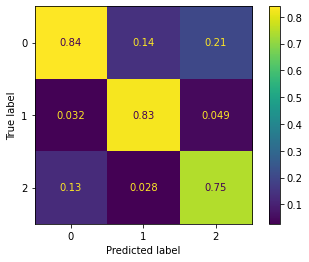

In [836]:
plot_confusion_matrix(fsm_pipe, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

# model 2 - mnb and using tfidf

In [963]:
vec = TfidfVectorizer(token_pattern=r"([a-zA-Z]+(?:'[a-z]+)?)", stop_words=sw)
vec.fit_transform(df_train_clean['tokenized'])
x = vec.vocabulary_
df = x.items()
df_list = list(df)
df_df = pd. DataFrame(df_list )
df_df.sort_values(by = 1, ascending = False)

,0,1
3992,zynga,6992
5507,zuckerberg,6991
4918,zoom,6990
687,zone,6989
2359,zomg,6988
...,...,...
2811,abandon,4
1807,ab,3
2380,aarpbulletin,2
6503,aaron,1


In [964]:
pipeline
fit the pipeline
print_cv_scores 
plot_confusion_score

SyntaxError: invalid syntax (<ipython-input-964-e8d37495e0d5>, line 2)

In [965]:
sw = stopwords.words('english')


model2_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=sw)),
                     ('mnb', MultinomialNB())
])


model2_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('mnb', MultinomialNB())])

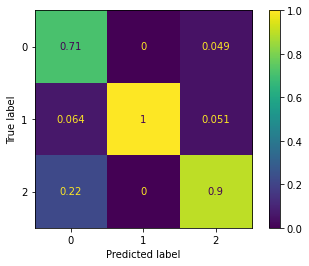

In [966]:
plot_confusion_matrix(model2_pipe, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

In [967]:
print_cv_scores(model2_pipe, df_train_clean['tokenized'], df_train_clean['target'])

[0.74887809 0.74719521 0.74177263 0.74139865 0.75560957]
Training Accuracy 0.7469708302169036
##############
[0.64173523 0.64323111 0.65968586 0.64697083 0.64023934]
Cross_Val Accuracy 0.6463724756918474
##############
Training Macro Precision: 0.8749007797057823
Cross_Val Macro Precision: 0.5431798691245141
##############
Training Macro Recall: 0.486564820098749
Cross_Val Macro Recall: 0.3895321614972795
##############
Training Macro F1: 0.49147096493798886
Cross_Val Macro F1: 0.36510809009723344


# model 3 - just like model 2 but using smote

In [968]:
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imbpipe

In [969]:
weight = {0:4031, 1:600, 2:2300}

mnb_pipe_smote = imbpipe([
                     ('tfidf', TfidfVectorizer(stop_words=sw)),
                     ('smote', SMOTE(random_state=42, sampling_strategy = weight )),
                     ('mnb', MultinomialNB(alpha = 0.8))
])


mnb_pipe_smote.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('smote',
                 SMOTE(random_state=42,
                       sampling_strategy={0: 4031, 1: 600, 2: 2300})),
                ('mnb', MultinomialNB(alpha=0.8))])

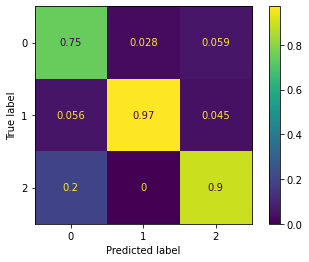

In [970]:
plot_confusion_matrix(mnb_pipe_smote, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

In [971]:
print_cv_scores(mnb_pipe_smote, df_train_clean['tokenized'], df_train_clean['target'])

[0.79637248 0.79693343 0.79525056 0.79674645 0.80347794]
Training Accuracy 0.7977561705310395
##############
[0.66043381 0.6551982  0.6671653  0.67314884 0.6551982 ]
Cross_Val Accuracy 0.6622288706058338
##############
Training Macro Precision: 0.8792261522170165
Cross_Val Macro Precision: 0.7076518236396081
##############
Training Macro Recall: 0.5921701826127046
Cross_Val Macro Recall: 0.4347050022858143
##############
Training Macro F1: 0.6389209528106996
Cross_Val Macro F1: 0.44161353701087575


# model 4 - random forest 

In [972]:
RF_pipe = Pipeline([('tfidf', TfidfVectorizer(stop_words=sw)),
                     ('rf', RandomForestClassifier(class_weight="balanced"))
])


RF_pipe.fit(df_train_clean['tokenized'], df_train_clean['target'])

Pipeline(steps=[('tfidf',
                 TfidfVectorizer(stop_words=['i', 'me', 'my', 'myself', 'we',
                                             'our', 'ours', 'ourselves', 'you',
                                             "you're", "you've", "you'll",
                                             "you'd", 'your', 'yours',
                                             'yourself', 'yourselves', 'he',
                                             'him', 'his', 'himself', 'she',
                                             "she's", 'her', 'hers', 'herself',
                                             'it', "it's", 'its', 'itself', ...])),
                ('rf', RandomForestClassifier(class_weight='balanced'))])

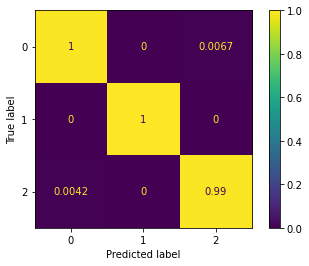

In [973]:
plot_confusion_matrix(RF_pipe, 
                      df_train_clean['tokenized'], 
                      df_train_clean['target'], 
                      normalize='pred');

In [974]:
print_cv_scores(RF_pipe, df_train_clean['tokenized'], df_train_clean['target'])

[0.99513837 0.99626028 0.99626028 0.9960733  0.99532536]
Training Accuracy 0.9958115183246073
##############
[0.67314884 0.64323111 0.68212416 0.69483919 0.65893792]
Cross_Val Accuracy 0.6704562453253553
##############
Training Macro Precision: 0.9964239698804986
Cross_Val Macro Precision: 0.6810237031231074
##############
Training Macro Recall: 0.9970817471938883
Cross_Val Macro Recall: 0.4753539828249676
##############
Training Macro F1: 0.9967501313050061
Cross_Val Macro F1: 0.5011146367594348


# RF GridSearch 

In [62]:
from sklearn.model_selection import GridSearchCV

grid = {
        "tfidf__max_df" : [0.7, 0.8, 0.9],
        
        "tfidf__min_df" : [0.1, 0.15, 0.2],
    
        "tfidf__ngram_range" : [(1,1), (1,2),(2,2)],
    
        "rf__class_weight" : ['balanced', 'balanced_subsample'],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['tokenized'], df_train_clean['target'])

gridsearch.best_params_

Fitting 3 folds for each of 1458 candidates, totalling 4374 fits
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_w

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=10, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=15, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=1, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.1s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=2, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.6s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_e

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.2s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=

[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.9s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   1.0s
[CV] END rf__class_weight=balanced, rf__max_depth=20, rf__min_samples_leaf=3, rf

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balance

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.8s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=ba

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.9s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.8s
[CV] END rf__class_weight=b

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.5s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   0.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   0.4s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   0.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   0.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   0.7s
[CV] END rf__class_weight=

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  15.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  14.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  14.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   7.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=10, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   6.8s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   4.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   5.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   5.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   5.0s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   2.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   4.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   4.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   5.6s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   4.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   8.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   9.2s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=  15.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  17.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  16.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  18.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   6.2s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  11.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  11.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  11.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  12.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  12.4s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   2.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   2.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.8s
[CV] END rf__class_weight=balanc

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   4.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   7.3s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=  13.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=  14.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  15.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  15.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  15.3s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   5.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  11.4s
[CV] END rf__class_weight=bal

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   2.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   2.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   2.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.5s
[CV] END rf__class_weight=balance

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   5.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   4.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.8s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   6.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.8s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   7.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   7.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   7.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   8.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   8.2s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   6.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   6.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   9.8s
[CV] END rf__class_weight=ba

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  14.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   5.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   5.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   5.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=15, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=  10.8s
[CV] END rf__class_weight=bal

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   5.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   5.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=   5.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   3.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   3.1s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   4.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   4.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   5.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   6.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   6.1s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   9.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   9.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=  10.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  11.5s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   4.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   7.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   6.6s
[CV] END rf__class_weight=balanc

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  19.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  20.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   6.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   6.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   6.2s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  11.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  13.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  13.2s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  13.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=1, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   6.3s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   4.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   4.3s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   5.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   5.7s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   3.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   8.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   8.5s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   9.1s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=50, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=   6.1s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  17.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  17.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=  17.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   5.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   5.8s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  12.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  11.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=2, rf__n_estimators=100, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  11.8s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   3.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   3.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=   4.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   5.4s
[CV] END rf__class_weight=balan

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.8, tfidf__min_df=0.2, tfidf__ngram_range=(2, 2); total time=   2.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   4.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=25, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   4.6s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   8.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(1, 2); total time=   7.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.7, tfidf__min_df=0.15, tfidf__ngram_range=(2, 2); total time=   3.7s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 1); total time=   8.0s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   8.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   9.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(1, 2); total time=   8.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=50, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   3.6s
[CV] END rf__class_weight=balanced_

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.6s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 1); total time=  10.4s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  11.1s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.7, tfidf__min_df=0.2, tfidf__ngram_range=(1, 2); total time=  11.6s
[CV] END rf__class_weight=bala

[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   5.8s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.1, tfidf__ngram_range=(2, 2); total time=   5.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=  10.7s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=  10.9s
[CV] END rf__class_weight=balanced_subsample, rf__max_depth=20, rf__min_samples_leaf=3, rf__n_estimators=100, tfidf__max_df=0.9, tfidf__min_df=0.15, tfidf__ngram_range=(1, 1); total time=  10.7s
[CV] END rf__class_weight=b

{'rf__class_weight': 'balanced',
 'rf__max_depth': 15,
 'rf__min_samples_leaf': 1,
 'rf__n_estimators': 25,
 'tfidf__max_df': 0.9,
 'tfidf__min_df': 0.1,
 'tfidf__ngram_range': (1, 1)}

In [ ]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
        "tfidf__max_df" : [0.9, 0.95, 0.98],
        
        "tfidf__min_df" : [0.1, 0.05, 0.15],
    
        "tfidf__ngram_range" : [(1,1), (1,2)],
    
        "rf__class_weight" : ['balanced'],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

In [ ]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {"tfidf__ngram_range" : [(1,1), (1,2)],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

In [ ]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
        "tfidf__max_features" : [5000, None],
    
        "rf__n_estimators": [25, 50, 100], 
        
        "rf__max_depth" : [10, 15, 20], 
        
        "rf__min_samples_leaf" : [1, 2, 3]
       
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, return_train_score=True, verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

In [ ]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

In [ ]:
from sklearn.model_selection import GridSearchCV

grid = {
        "tfidf__max_df" : [0.9, 0.95, 0.98],
        
        "tfidf__min_df" : [0.1, 0.05, 0.15],
    
        "tfidf__ngram_range" : [(1,1), (1,2)],
       
        "tfidf__max_features" : [5000, None]
       
       }

gridsearch = GridSearchCV(RF_pipe, grid, cv=3, scoring='precision_macro', verbose=2) 

gridsearch.fit(df_train_clean['text'], df_train_clean['target'])

gridsearch.best_params_

In [ ]:
gridsearch.best_score_

In [ ]:
print('Mean Test Score: {}'.format(gridsearch.cv_results_['mean_test_score'].mean())) 
print('Mean Train Score: {}'.format(gridsearch.cv_results_['mean_train_score'].mean()))

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(data, window=5, min_count=1, workers=4)

model.train(data, total_examples=model.corpus_count, epochs=model.epochs)

In [ ]:
wv = model.wv

In [ ]:
wv.most_similar('rumor')

In [ ]:
wv.most_similar(negative='Cat')

wv['Cat']

wv.vectors

wv.most_similar(positive=['king', 'woman'], negative=['man'])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score

rf =  Pipeline([('Word2Vec Vectorizer', W2vVectorizer(df_train_clean['text'])),
              ('Random Forest', RandomForestClassifier(n_estimators=100, verbose=True))])

# Ran Our Best Model on the Test Set

Accuracy Score: 0.6594885598923284
Macro Precision Score: 0.7891843680813966
Micro Precision Score: 0.6594885598923284
Macro Recall Score: 0.40779484650538195
Micro Recall Score: 0.6594885598923284


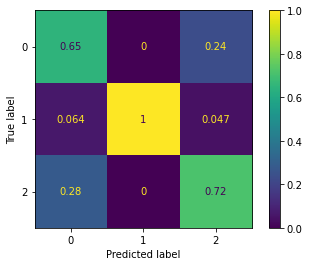

In [975]:
model2_pipe.score(df_test_clean['tokenized'], df_test_clean['target'])

plot_confusion_matrix(model2_pipe, 
                      df_test_clean['tokenized'], 
                      df_test_clean['target'], 
                      normalize='pred');

y_hat = model2_pipe.predict(df_test_clean['tokenized'])


acc = accuracy_score(df_test_clean['target'],y_hat)
macro_precision_score=precision_score(df_test_clean['target'], y_hat, average='macro')
micro_precision_score=precision_score(df_test_clean['target'], y_hat, average='micro')
macro_recall_score=recall_score(df_test_clean['target'], y_hat, average='macro')
micro_recall_score=recall_score(df_test_clean['target'], y_hat, average='micro')

print('Accuracy Score: {}'.format(acc))
print('Macro Precision Score: {}'.format(macro_precision_score))
print('Micro Precision Score: {}'.format(micro_precision_score))
print('Macro Recall Score: {}'.format(macro_recall_score))
print('Micro Recall Score: {}'.format(micro_recall_score))
